<a href="https://colab.research.google.com/github/Maheshkumarcseb/Machine_learning/blob/main/Building_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

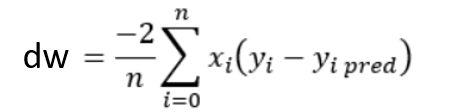

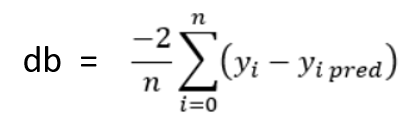

In [1]:
# importing numpy library
import numpy as np

**Linear Regression**

In [3]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b



using linear Regression model for regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
#loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [6]:
#last five row of dataset
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
# number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [9]:
# checking for the missing value
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


splitting the feature and target

In [10]:
X=salary_data.iloc[:,:-1].values  # -1 is removing the salary column
Y=salary_data.iloc[:,-1].values   # in this we are taking only salary column

In [11]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


splitting the dataset into training and test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

Training the linear Regression model

In [14]:
model=Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [15]:
model.fit(X_train, Y_train)

In [16]:
#printing the parameter values (weight and bias)
print('weight=',model.w[0])  # weight is w
print('model=',model.b)  # bias is b

weight= 9514.400999035135
model= 23697.406507136307


y=9514(x) + 23697

salary =9514(experience) + 23697

Predicting the salary for the test data

In [17]:
test_data_prediction = model.predict(X_test)

In [18]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


visulaizing the predicated values and actual values

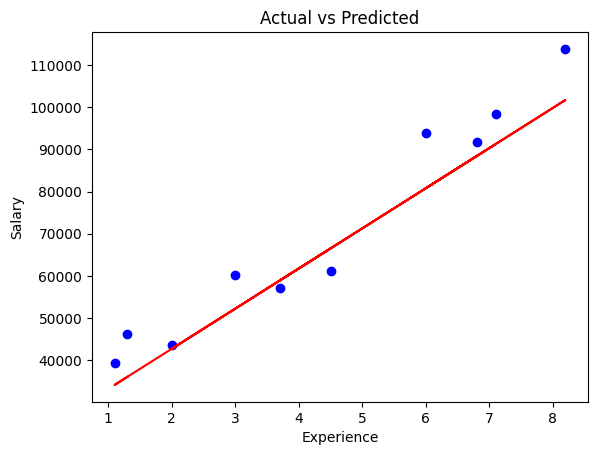

In [19]:
plt.scatter(X_test, Y_test,color='blue')
plt.plot(X_test, test_data_prediction, color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')
plt.show()